# Do Masks Mandates Affect Covid-19 Results?

### Original data and column descriptions: [Covid Tracking Project](https://covidtracking.com/data/download)


<center> <h2> States to be Explored</h2></center>

| State | Mask Mandate/Effective Date | # missing values in Date Range|
| --- | --- | --- |
| South Carolina | N/A | 0 |
| North Carolina | 06-24-2020 | 0 |
| Georgia | N/A | 0 |
| Virginia | 05-29-2020 | 0 |
| Arkansas | 07-20-2020 | 0 |
| New Jersey | 07-08-2020 | 0 |
| Connecticut | 04-20-2020 | 0 |



<center> <h3> Date Range to be Explored: 4/13/20-7/27/20 </h3></center>



## Importing Data

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import requests
from io import StringIO
import matplotlib.pyplot as plt

In [4]:
#Import data directly from google drive as data
orig_url = 'https://drive.google.com/file/d/1D3KX8DD2V__a3wnIf9UyQ1z_0rlS55WC/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)

## Data Understanding: Entire Dataset

In [5]:
pd.options.display.max_columns=None
data.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200727,AK,3206.0,204162.0,NaN,38.0,NaN,NaN,NaN,3.0,NaN,817.0,A,7/27/2020 00:00,2020-07-27T00:00:00Z,07/26 20:00,21.0,NaN,2020-07-27T00:00:00Z,207264.0,NaN,NaN,3206.0,21.0,NaN,2,104,0,207368,207368,104,207368,1,0,de28ff6d7d2874c791219904c2fa81f83142a78f,0,0,0,0,0,NaN
1,20200727,AL,81115.0,576844.0,NaN,1599.0,9694.0,NaN,1081.0,NaN,577.0,32510.0,B,7/27/2020 11:00,2020-07-27T11:00:00Z,07/27 07:00,1491.0,9694.0,2020-07-27T11:00:00Z,655973.0,NaN,NaN,79129.0,1446.0,45.0,1,1821,6452,657959,657959,8273,657959,18,537,906fddfa88864f88bdf0d2bcb19cf267a406f2e6,0,0,0,0,0,NaN
2,20200727,AR,39447.0,445444.0,NaN,489.0,2624.0,NaN,NaN,110.0,369.0,32365.0,A,7/27/2020 14:40,2020-07-27T14:40:00Z,07/27 10:40,408.0,2624.0,2020-07-27T14:40:00Z,484891.0,NaN,NaN,39447.0,NaN,NaN,5,824,6800,484891,484891,7624,484891,7,82,819db85fb84f50809d492ae373ea4914e01077f0,0,0,0,0,0,NaN
3,20200727,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,7/16/2020 00:00,2020-07-16T00:00:00Z,07/15 20:00,0.0,NaN,2020-07-16T00:00:00Z,NaN,NaN,NaN,0.0,NaN,NaN,60,0,0,1037,1037,0,1037,0,0,e2900aeb060df366a3f3a70300dccec3b2e33ae8,0,0,0,0,0,NaN
4,20200727,AZ,163827.0,714506.0,NaN,2626.0,7751.0,820.0,NaN,567.0,NaN,21321.0,A+,7/27/2020 00:00,2020-07-27T00:00:00Z,07/26 20:00,3304.0,7751.0,2020-07-27T00:00:00Z,878333.0,NaN,NaN,137710.0,2431.0,152.0,4,1813,9417,878333,878333,11230,878333,-1,45,11d6f676a2f3a2381d94968e48b3b0b447284a05,0,0,0,0,0,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 41 columns):
date                        8081 non-null int64
state                       8081 non-null object
positive                    8066 non-null float64
negative                    7925 non-null float64
pending                     1054 non-null float64
hospitalizedCurrently       5511 non-null float64
hospitalizedCumulative      4297 non-null float64
inIcuCurrently              2802 non-null float64
inIcuCumulative             1159 non-null float64
onVentilatorCurrently       2454 non-null float64
onVentilatorCumulative      410 non-null float64
recovered                   4934 non-null float64
dataQualityGrade            6980 non-null object
lastUpdateEt                7737 non-null object
dateModified                7737 non-null object
checkTimeEt                 7737 non-null object
death                       7383 non-null float64
hospitalized                4297 non-null float64
d

## Data Preprocessing I
* Convert columns to categorical and datetime
* Select the columns relevant to our study:
    1. Date
    2. State
    3. Positive
    4. Negative
    5. Total Test Results
    6. Total Test Results Increase
* Check/Handle any null values

In [7]:
#Change state to category type
data['state'] = data['state'].astype('category')
print(data.state.cat.categories)

Index(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype='object')


In [8]:
#We will select only features pertaining to date, negative, positive, state, totalTestResults,
#totalTestResultsIncrease and store it into data_sub as the subset
data_sub = data[['date', 'state', 'positive', 'negative', 'totalTestResults', 'totalTestResultsIncrease']]

In [9]:
#Convert date to date-time object
data_sub.date = pd.to_datetime(data_sub.date, format='%Y%m%d', errors='coerce')

#Check to make sure all dates converted properly ie. errors='coerce' did not return a NAN
pd.isna(data_sub.date).sum()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0

## Data Understanding: Subset of Data

In [10]:
#Display date ranges for entire dataset
print(max(data_sub['date']))
print(min(data_sub['date']))

2020-07-27 00:00:00
2020-01-22 00:00:00


In [11]:
#Check for any null/nan values in dataset
print(data_sub.isna().sum())

#display rows where one or more nan values are present
data_sub_na = data_sub[data_sub.isna().any(axis=1)]

date                          0
state                         0
positive                     15
negative                    156
totalTestResults              0
totalTestResultsIncrease      0
dtype: int64


### Although there are missing data values in the dataset for the positive and negative columns, we will ignore for now and check again when we further split the data up among state/date ranges and handle if necessary.

In [12]:
#display the head of subset
data_sub.head()

,date,state,positive,negative,totalTestResults,totalTestResultsIncrease
0,2020-07-27,AK,3206.0,204162.0,207368,104
1,2020-07-27,AL,81115.0,576844.0,657959,8273
2,2020-07-27,AR,39447.0,445444.0,484891,7624
3,2020-07-27,AS,0.0,1037.0,1037,0
4,2020-07-27,AZ,163827.0,714506.0,878333,11230


In [13]:
#check using describe to see if any anomalies are present
data_sub.describe()

,positive,negative,totalTestResults,totalTestResultsIncrease
count,8066.000000,7.925000e+03,8.081000e+03,8081.000000
mean,27771.993429,2.667039e+05,2.892757e+05,6465.931197
std,58426.108202,5.715614e+05,6.185833e+05,12944.340929
min,0.000000,0.000000e+00,0.000000e+00,-74189.000000
25%,633.250000,1.205200e+04,1.118400e+04,296.000000
50%,6260.000000,7.752900e+04,8.166000e+04,2056.000000
75%,28532.250000,2.783180e+05,3.001000e+05,7023.000000
max,460550.000000,6.836028e+06,7.296578e+06,165227.000000


## Data Preprocessing II
* Create Helper functions to further subset the data by State & Date Range
* Test Helper functions
* Check each state by date range individually for missing values

### Helper Functions

In [14]:
#Function that returns only data for a specified state
def getStateSubset(stateName):
    return data_sub.loc[data_sub['state'] == stateName]

In [15]:
#Test to make sure getStateSubset() works properly
desired_state_data = getStateSubset('AK')
desired_state_data['state'].unique()

[AK]
Categories (1, object): [AK]

In [16]:
#Frunction that returns only data from a specific date range
def getStateSubsetByDateRange(start, end, stateName):
    state_df = getStateSubset(stateName)
    mask = (state_df['date'] >= start) & (state_df['date'] <= end)
    return state_df.loc[mask]

In [17]:
#Test to make sure dates fall into the specified range
desired_state_data = getStateSubsetByDateRange('2020-04-13', '2020-07-27', 'NC')
print(min(desired_state_data['date']))
print(max(desired_state_data['date']))

2020-04-13 00:00:00
2020-07-27 00:00:00


### Check all States to be explored for missing values

In [18]:
#Check all selected states within the date range for any null values
start_date = '2020-04-13'
end_date = '2020-07-27'
stateNames = ['AR', 'CT', 'NC', 'SC', 'VA', 'NJ', 'GA']
for stateName in stateNames:
#    desired_data = desired_data.iloc[0:0]
    desired_data = getStateSubsetByDateRange(start_date, end_date, stateName)
    #Check desired_data for any null values
    print(stateName)
    print(desired_data.isna().sum())
    print('-------------------------')

AR
date                        0
state                       0
positive                    0
negative                    0
totalTestResults            0
totalTestResultsIncrease    0
dtype: int64
-------------------------
CT
date                        0
state                       0
positive                    0
negative                    0
totalTestResults            0
totalTestResultsIncrease    0
dtype: int64
-------------------------
NC
date                        0
state                       0
positive                    0
negative                    0
totalTestResults            0
totalTestResultsIncrease    0
dtype: int64
-------------------------
SC
date                        0
state                       0
positive                    0
negative                    0
totalTestResults            0
totalTestResultsIncrease    0
dtype: int64
-------------------------
VA
date                        0
state                       0
positive                    0
negative           

## Template for selecting specific state data by date range
**getStateSubsetByDateRange(start_date, end_date, state)**
* **start_date:** Beginning of date range in format 'YYYY-MM-DD'
* **end_date:** End of date range in format 'YYYY-MM-DD'
* **state:** Abbreviation of state to find data for


**Returns:** Pandas Dataframe representing Covid-19 Data for a specific State by Date Range

In [19]:
start_date = '2020-04-13'
end_date = '2020-07-27'
state = 'AR'

desired_state_data = getStateSubsetByDateRange(start_date, end_date, state)

# Visualizations
<center> <h2> Positive Covid-19 Test Growth Rate Per State: </h2></center>


| <center><font size=40 color='#9f9fff'>Scaled to Fit</font></center> | <center><font align="center" size=40 color='#9f9fff'>Not Scaled</font></center> |
| :---------------------: | :---------------------------: |
![alt](../img/VA_Scaled.png) | ![alt](../img/VA_Not_Scaled.png)
![alt](../img/NC_Scaled.png) | ![alt](../img/NC_Not_Scaled.png)
![alt](../img/SC_Scaled.png) | ![alt](../img/SC_Not_Scaled.png)
![alt](../img/AR_Scaled.png) | ![alt](../img/AR_Not_Scaled.png)
![alt](../img/GA_Scaled.png) | ![alt](../img/GA_Not_Scaled.png)
![alt](../img/CT_Scaled.png) | ![alt](../img/CT_Not_Scaled.png)
![alt](../img/NJ_Scaled.png) | ![alt](../img/NJ_Not_Scaled.png)


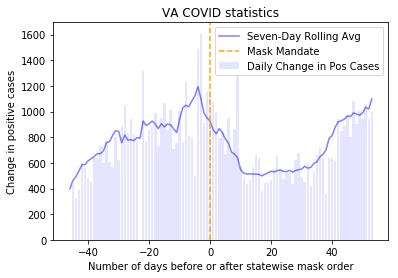

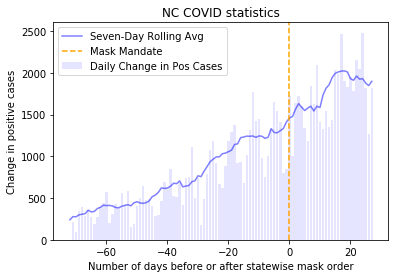

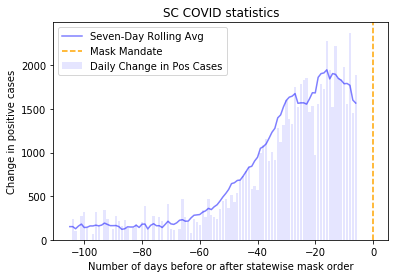

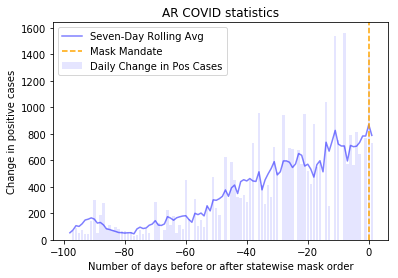

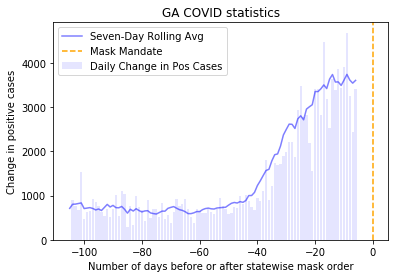

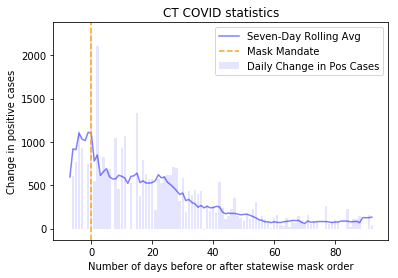

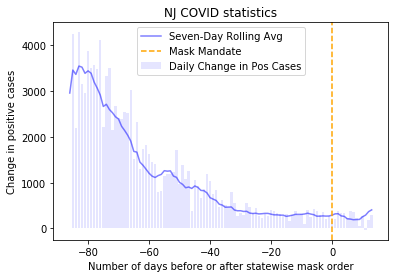

In [58]:
stateNames = ['VA', 'NC', 'SC', 'AR', 'GA', 'CT', 'NJ']
for stateName in stateNames:
    desired_state_data = getStateSubsetByDateRange(start_date, end_date, stateName)
    
# re-index so that "index" and "index + 1"  will be correctly computed
    desired_state_data.reset_index(drop = True, inplace=True)
    
# Store date mask order went into effect.  Ideally this would be read into another dataframe and merged
# but in the interest of time we are using the following.
    if stateName == 'AR':
        mask_order_date = pd.to_datetime('2020-07-20')
    elif stateName == 'CT':
        mask_order_date = pd.to_datetime('2020-04-20')
    elif stateName == 'NC':
        mask_order_date = pd.to_datetime('2020-06-24')
    elif stateName == 'VA':
        mask_order_date = pd.to_datetime('2020-05-29')
    elif stateName == 'NJ':
        mask_order_date = pd.to_datetime('2020-07-08')
    elif stateName == 'VA':
        mask_order_date = pd.to_datetime('2020-05-29')
    else:
        mask_order_date = pd.to_datetime(end_date)
        
#Add columns for days before or after mask order, and increase/decrease in positive cases
    desired_state_data['days_bef_after_mask_order'] = desired_state_data['date'] - mask_order_date
    desired_state_data['pos_growth'] = 0
     
# Fill the daily increase/decrease by computing it
    row_count = desired_state_data.shape[0]
    for index in range(0, row_count-1):
        n_today     = desired_state_data.iloc[index]['positive']
        n_yesterday = desired_state_data.iloc[index+1]['positive']
        growth = n_today - n_yesterday
        desired_state_data.at[index, 'pos_growth'] = growth
        
# Add a column for the rolling seven-day average, load into a new data frame and re-graph
    desired_state_data['rolling_avg'] = desired_state_data.loc[:, ['pos_growth']].rolling(window=7).mean()
 # Restrict rows since there is no rolling average until day 7
    columns = desired_state_data.columns
    dsd7 = desired_state_data.iloc[6:, [columns.get_loc('days_bef_after_mask_order'), \
                   columns.get_loc('pos_growth'), \
                   columns.get_loc('rolling_avg')]]
        
#retain for testing purposes   print(desired_state_data[['date', 'positive', 'pos_growth']])
    #ax = ts.plot(kind="bar")
    # Plot the daily increase/decrease in cases by day, with the date the mask order was applied as "Day 0"
    # Add another line for seven-day rolling average
    plt.bar(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['pos_growth'], color='blue', alpha=0.1)
    plt.plot(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['rolling_avg'], color = 'blue', alpha = 0.5)
    title = stateName + ' COVID statistics'
    plt.title(title)
    plt.axvline(x=0,color='orange', ls='--')
    plt.legend(['Seven-Day Rolling Avg', 'Mask Mandate', 'Daily Change in Pos Cases'],loc=0)
    plt.xlabel('Number of days before or after statewise mask order')
    plt.ylabel('Change in positive cases')
    plt.show()
        

### Positive Covid-19 Test Growth Rate Per State:
#### Note: Scaled from 0-4000 for all states

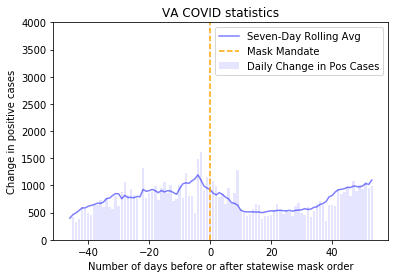

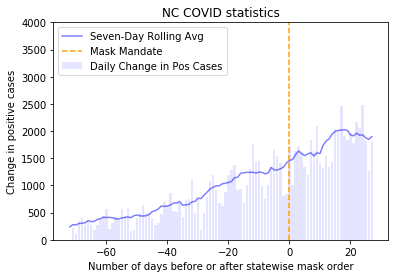

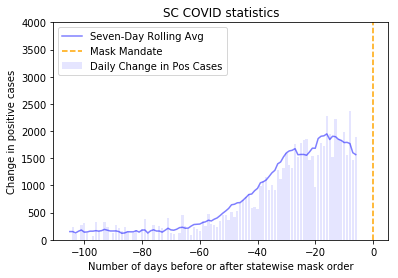

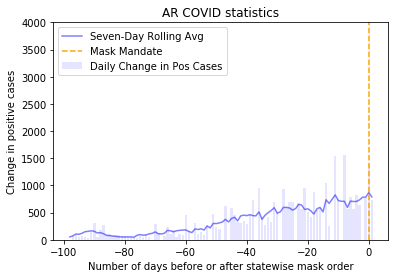

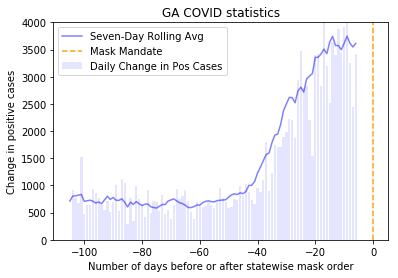

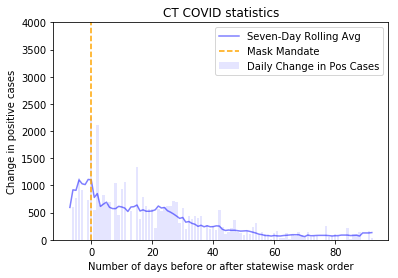

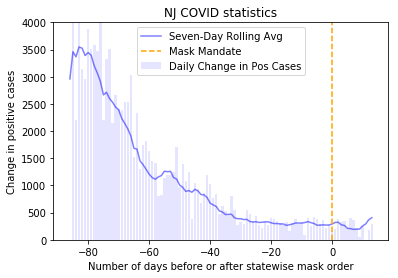

In [59]:
stateNames = ['VA', 'NC', 'SC', 'AR', 'GA', 'CT', 'NJ']
for stateName in stateNames:
    desired_state_data = getStateSubsetByDateRange(start_date, end_date, stateName)
    
# re-index so that "index" and "index + 1"  will be correctly computed
    desired_state_data.reset_index(drop = True, inplace=True)
    
# Store date mask order went into effect.  Ideally this would be read into another dataframe and merged
# but in the interest of time we are using the following.
    if stateName == 'AR':
        mask_order_date = pd.to_datetime('2020-07-20')
    elif stateName == 'CT':
        mask_order_date = pd.to_datetime('2020-04-20')
    elif stateName == 'NC':
        mask_order_date = pd.to_datetime('2020-06-24')
    elif stateName == 'VA':
        mask_order_date = pd.to_datetime('2020-05-29')
    elif stateName == 'NJ':
        mask_order_date = pd.to_datetime('2020-07-08')
    elif stateName == 'VA':
        mask_order_date = pd.to_datetime('2020-05-29')
    else:
        mask_order_date = pd.to_datetime(end_date)
        
#Add columns for days before or after mask order, and increase/decrease in positive cases
    desired_state_data['days_bef_after_mask_order'] = desired_state_data['date'] - mask_order_date
    desired_state_data['pos_growth'] = 0
     
# Fill the daily increase/decrease by computing it
    row_count = desired_state_data.shape[0]
    for index in range(0, row_count-1):
        n_today     = desired_state_data.iloc[index]['positive']
        n_yesterday = desired_state_data.iloc[index+1]['positive']
        growth = n_today - n_yesterday
        desired_state_data.at[index, 'pos_growth'] = growth
        
# Add a column for the rolling seven-day average, load into a new data frame and re-graph
    desired_state_data['rolling_avg'] = desired_state_data.loc[:, ['pos_growth']].rolling(window=7).mean()
 # Restrict rows since there is no rolling average until day 7
    columns = desired_state_data.columns
    dsd7 = desired_state_data.iloc[6:, [columns.get_loc('days_bef_after_mask_order'), \
                   columns.get_loc('pos_growth'), \
                   columns.get_loc('rolling_avg')]]
        
#retain for testing purposes   print(desired_state_data[['date', 'positive', 'pos_growth']])
    #ax = ts.plot(kind="bar")
    # Plot the daily increase/decrease in cases by day, with the date the mask order was applied as "Day 0"
    # Add another line for seven-day rolling average
    plt.bar(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['pos_growth'], color='blue', alpha=0.1)
    plt.plot(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['rolling_avg'], color = 'blue', alpha = 0.5)
    title = stateName + ' COVID statistics'
    plt.title(title)
    plt.axvline(x=0,color='orange', ls='--')
    plt.legend(['Seven-Day Rolling Avg', 'Mask Mandate', 'Daily Change in Pos Cases'],loc=0)
    plt.xlabel('Number of days before or after statewise mask order')
    plt.ylabel('Change in positive cases')
    plt.ylim(top=4000)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=0)  # adjust the bottom leaving top unchanged
    plt.show()